## 난임 환자 대상 임신 성공 여부 예측

### LGAimers 6th 온라인 해커톤

Import

In [29]:
import pandas as pd
import lightgbm as lgb
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier

### Data Load

In [30]:
# 데이터 로드
Total_train = pd.read_csv('../data/Total_train_dataset_38.csv')
Total_test = pd.read_csv('../data/Total_test_dataset_38.csv')

In [31]:
# ID 열을 제외한 특성과 타겟 변수 분리
Total_X = Total_train.drop(['임신_성공_여부', 'ID'], axis=1)
Total_y = Total_train['임신_성공_여부']

### 인코딩 

In [32]:
Total_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256344 entries, 0 to 256343
Data columns (total 100 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   시술_당시_나이               256344 non-null  object 
 1   임신_시도_또는_마지막_임신_경과_연수  256344 non-null  float64
 2   배란_자극_여부               256344 non-null  int64  
 3   배란_유도_유형               256344 non-null  object 
 4   단일_배아_이식_여부            256344 non-null  float64
 5   착상_전_유전_검사_사용_여부       256344 non-null  float64
 6   착상_전_유전_진단_사용_여부       256344 non-null  float64
 7   남성_주_불임_원인             256344 non-null  int64  
 8   남성_부_불임_원인             256344 non-null  int64  
 9   여성_주_불임_원인             256344 non-null  int64  
 10  여성_부_불임_원인             256344 non-null  int64  
 11  부부_주_불임_원인             256344 non-null  int64  
 12  부부_부_불임_원인             256344 non-null  int64  
 13  불임원인여부_불명확             256344 non-null  int64  
 14  불임_원인_-_난관_질환          256344 non-n

In [33]:
Total_categorical_columns = [
    "시술_당시_나이",
    "배란_유도_유형",
    "난자_출처",
    "정자_출처",
    "난자_기증자_나이",
    "정자_기증자_나이"
]

In [34]:
# 모든 범주형 변수를 문자열로 변환
Total_X[Total_categorical_columns] = Total_X[Total_categorical_columns].astype(str)
Total_test[Total_categorical_columns] = Total_test[Total_categorical_columns].astype(str)

# OrdinalEncoder를 사용하여 범주형 변수 인코딩
Total_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

Total_X[Total_categorical_columns] = Total_encoder.fit_transform(Total_X[Total_categorical_columns])
Total_test[Total_categorical_columns] = Total_encoder.transform(Total_test[Total_categorical_columns])

## Modeling

In [35]:
# 데이터 분할
Total_X_train, Total_X_test, Total_y_train, Total_y_test = train_test_split(Total_X, Total_y, test_size=0.2, random_state=42)

### Total 데이터

In [36]:
# %pip install autogluon

In [37]:
import pandas as pd
from autogluon.tabular import TabularPredictor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 학습 데이터와 테스트 데이터를 합쳐서 DataFrame 생성
train_data = pd.concat([Total_X_train, Total_y_train], axis=1)
test_data = pd.concat([Total_X_test, Total_y_test], axis=1)

# 타겟 컬럼 이름
label = Total_y_train.name

# AutoGluon 초기화 및 모델 학습
predictor = TabularPredictor(label=label, eval_metric='roc_auc').fit(train_data, time_limit=21600) # 6시간

# 앙상블 모델 구성 요소 확인
predictor.leaderboard(silent=True)

No path specified. Models will be saved in: "AutogluonModels\ag-20250217_155759\"
Beginning AutoGluon training ... Time limit = 21600s
AutoGluon will save models to "AutogluonModels\ag-20250217_155759\"
AutoGluon Version:  0.6.2
Python Version:     3.7.8
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19041
Train Data Rows:    205075
Train Data Columns: 100
Label Column: 임신_성공_여부
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    3353.86 MB
	Train Data (Original)  

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.744826,25.452168,585.160376,0.000000,0.847875,2,True,13
1,NeuralNetTorch,0.742268,0.070029,422.884476,0.070029,422.884476,1,True,11
2,LightGBMLarge,0.740909,0.034450,8.740462,0.034450,8.740462,1,True,12
3,CatBoost,0.740836,0.000000,51.651859,0.000000,51.651859,1,True,7
4,LightGBM,0.740776,0.015625,10.670676,0.015625,10.670676,1,True,4
5,XGBoost,0.740444,0.008307,5.874320,0.008307,5.874320,1,True,10
6,LightGBMXT,0.738819,0.017401,6.798230,0.017401,6.798230,1,True,3
7,RandomForestEntr,0.737485,0.314462,44.329993,0.314462,44.329993,1,True,6
8,ExtraTreesEntr,0.735643,0.443647,46.817592,0.443647,46.817592,1,True,9
9,ExtraTreesGini,0.735185,0.248693,45.389281,0.248693,45.389281,1,True,8



--- Model Performance ---
Model Accuracy: 0.7450506153816147
Model F1 Score: 0.20709736123748862
Model AUC: 0.7374165472142917


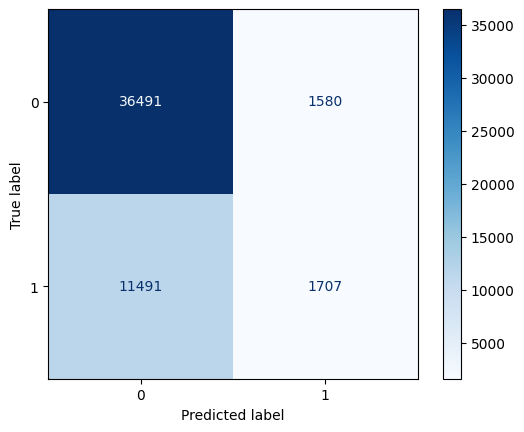

In [ ]:
# 예측
y_pred = predictor.predict(Total_X_test)
y_pred_proba = predictor.predict_proba(Total_X_test)[1]  # 1 클래스의 예측 확률을 선택

# 평가
accuracy = accuracy_score(Total_y_test, y_pred)
f1 = f1_score(Total_y_test, y_pred)
auc = roc_auc_score(Total_y_test, y_pred_proba)
cm = confusion_matrix(Total_y_test, y_pred)

# 결과 출력
print()
print("--- Model Performance ---")
print(f"Model Accuracy: {accuracy}")
print(f"Model F1 Score: {f1}")
print(f"Model AUC: {auc}")

# 혼동 행렬 출력
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=predictor.class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

----

.